In [1]:
import scipy
from scipy.special import erf
import numpy as np
from numpy import exp
from numpy.lib.scimath import log, sqrt
import matplotlib.pyplot as plt
# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0
def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))
def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### Exercise 03.1 Plain vanilla option pricing

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes analytic solution for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1.  By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2.  By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$


Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$ where $W(t)\sim\mathcal{N}(0,t)$. Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is: $$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i) +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$ with $Z_i \sim \mathcal{N}(0,1)$

Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. As usual, in computing statistical uncertainties, use data blocking.

### For comparison, Black-Scholes analytic solution:

In [2]:
if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


## <span style="color:purple"> Solution Exercise 03.1</span>

### Theory's problem:
- A market is a place where buyers and sellers meet to exchange products. At every time instant $t$ the products have a price, the **spot price**.
Traders are willing to accept a certain amount of **risk** to have higher outcomes. The aim of modern risk management consists in finding the sources of
potential losses and in limiting the risk as much as possible.
- Financial time series are impossible to predict because of the abundance of information in the financial data. When an information affect the price in a market in a specific way the market is said to be non completely efficient.
- An efficient market elaborate the new information so efficiently that all the current information about the market development is at all times completely contained in the present prices, this is called **Markov assumption**.
- To model a the evolution of the **spot price** $S(t)$, if the interest is paid once at the end of time $t$, we can write down: $S(t)=S(0)(1+rt)$ where $r$ is the risk free interest rate that the bank grants. Iteratin it for n payments in time $t$ we obtain $S(t)\approx S(0)e^{rt}$.
- An asset price is  similar to the bank deposit model above but perturbed by stochastic fluctuations, so $dS$ consists of two contribution: a deterministic and a random one. Combining the two contribution a reasonable ansatz is: $$ dS(t)= \mu S(t)dt+\sigma S(t)dW(t)$$ where $\mu$ is the drift and $\sigma$ the volatility. This is called **geometric brownian motion**.
- Because of the stochastic variable to integrate this equation is needed the Ito integral with take into account the equivalece $dw(t)^2=dt$ given by the non anticipating function $( \text{ statistically independent from } W(s)-W(t) \space \forall s,t \text{ with } s<t)$ properties as $W(t)$.
- The solution of the stochastic differential equation applying Ito's formula is: $$d\log{S(t)}=\left(\mu-\frac{1}{2}\sigma^2 \right)dt + \sigma dW(t)$$ that solved gives: $$ S(t)=S(t')\exp \left[\left(\mu+\frac{1}{2}\sigma^2\right)\left(t-t'\right)+\sigma\left(W(t)-W(t')\right)\right]$$
- So to sample the **spot price** can be used: $$S(t_{i+1}) = S(t_i) \exp \left[ \left( \mu - \frac{1}{2} \sigma^2 \right) \left(t_{i+1}-t_i\right)+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i} \right]$$ where $Z_i$ is independent and normally distributed.
- In idealized markets exists different options. Options are contracts in which only a partner assumes the obligation. The most famous option is the European option in which the *writer* (seller of the option) grants the *holder* (buyer of the option) the right to call option (purchase) or put option (sell to him an underlying) for a prescribed price $K$ at the expiry date $T$ in the future.
- For a call: $profit=\max\left[0,S(t)-K\right]$ while for a put: $profit=\max\left[0,K-S(t)\right]$
- **Black Scholes Theory** try to predict how much an option should cost starting from two assumprion:
  1] the market is maximally efficient
  2] the time evolution of the asset price is a geometric brownian mortion as showed above
From this hypothesis born the equations for the European Call-option price and the European Put-option price.

### Problem's approach:
In most cases we simulate a system extracting mean value measurements is required to be used the blocking method. Because of the complexity of the measures to be computed i tought i was a better idea to create come different classes so that the code could be cleaner and more general for next exercises.
- first of all i have created an abstarct class `BlockMeanCalculator` whose most important methods are a pure virtual method `calculate` that take in input a random number and a double and `Average` that take in input the number of block, the block size and the filename to save data and perform the blocking method.
- secondly I've created two derived classes of `BlockMeanCalculator` named `call_price` and `put_price` I've implemented the method `calculate` that calculate the **spot price** directly or discretized whether the boolean `m_direct` is `true` or `false`.
### Code:
The `calculate` method for the `put_price` calss is:
```cpp
    double put_price::calculate(double value,Random &rnd) const{
        double St;
        if(m_direct){
            //here we use the direct method
            St=spot_price(m_S0,m_r,m_sigma,m_T,rnd.Gauss(m_mu,m_T));
        }else{
            if(m_Nstep==0){throw invalid_argument("calcolo discreto con N_step=0.");}
            //here we use the discretized method
            St=spot_price(m_S0,m_r,m_sigma,m_T,rnd,m_Nstep);
        }
        value=put_option_price(m_r,m_T,m_K,St);
        return value;
    }
```

The `calculate` method for the `call_price` calss is:
```cpp
    double call_price::calculate(double value,Random &rnd) const{
        double St;
        if(m_direct){
            //here we use the direct method
            St=spot_price(m_S0,m_r,m_sigma,m_T,rnd.Gauss(m_mu,m_T));
        }else{
            if(m_Nstep==0){throw invalid_argument("calcolo discreto con N_step=0.");}
            //here we use the discretized method
            St=spot_price(m_S0,m_r,m_sigma,m_T,rnd,m_Nstep);
        }
        value=call_option_price(m_r,m_T,m_K,St);
        return value;
```
where the functions `spot_price`, `put-option_price`, `call_option_price` are defined as follow:

`spot_price`
```cpp
double spot_price(const double S0, const double mu, const double sigma, const double t, const double rnd){
    double wt=rnd;
    return S0*exp((mu-0.5*pow(sigma,2))*t+sigma*wt*sqrt(t));
}
double spot_price(const double S0, const double mu, const double sigma, const double t,Random &rnd,const int N_steps){
    double S=S0;
    double dt=t/N_steps;
    for(int i=0;i<N_steps;i++){
        double appoggio;
        appoggio=S*exp((mu-0.5*pow(sigma,2))*dt+sigma*rnd.Gauss(0,1)*sqrt(dt));
        S=appoggio;
    }
    return S;
}
```
`call_option_price`
```cpp
double call_option_price(const double r, const double T, const double K, const double S){
    return exp(-r*T)*max(S-K,0.);
}
```
`put-option_price`
```cpp
double put_option_price(const double r, const double T, const double K, const double S){
    return exp(-r*T)*max(K-S,0.);
}
```
### Plot parameters:
- Number of block: $800$
- Lenght of the block: $10^5$
- Number of step for computing discretized spot price: $10^4$

### Results:
as showed in the following plots both the direct and discrete call and put prices are coherent with the expected ones by the  Black-Scholes analytic solution.

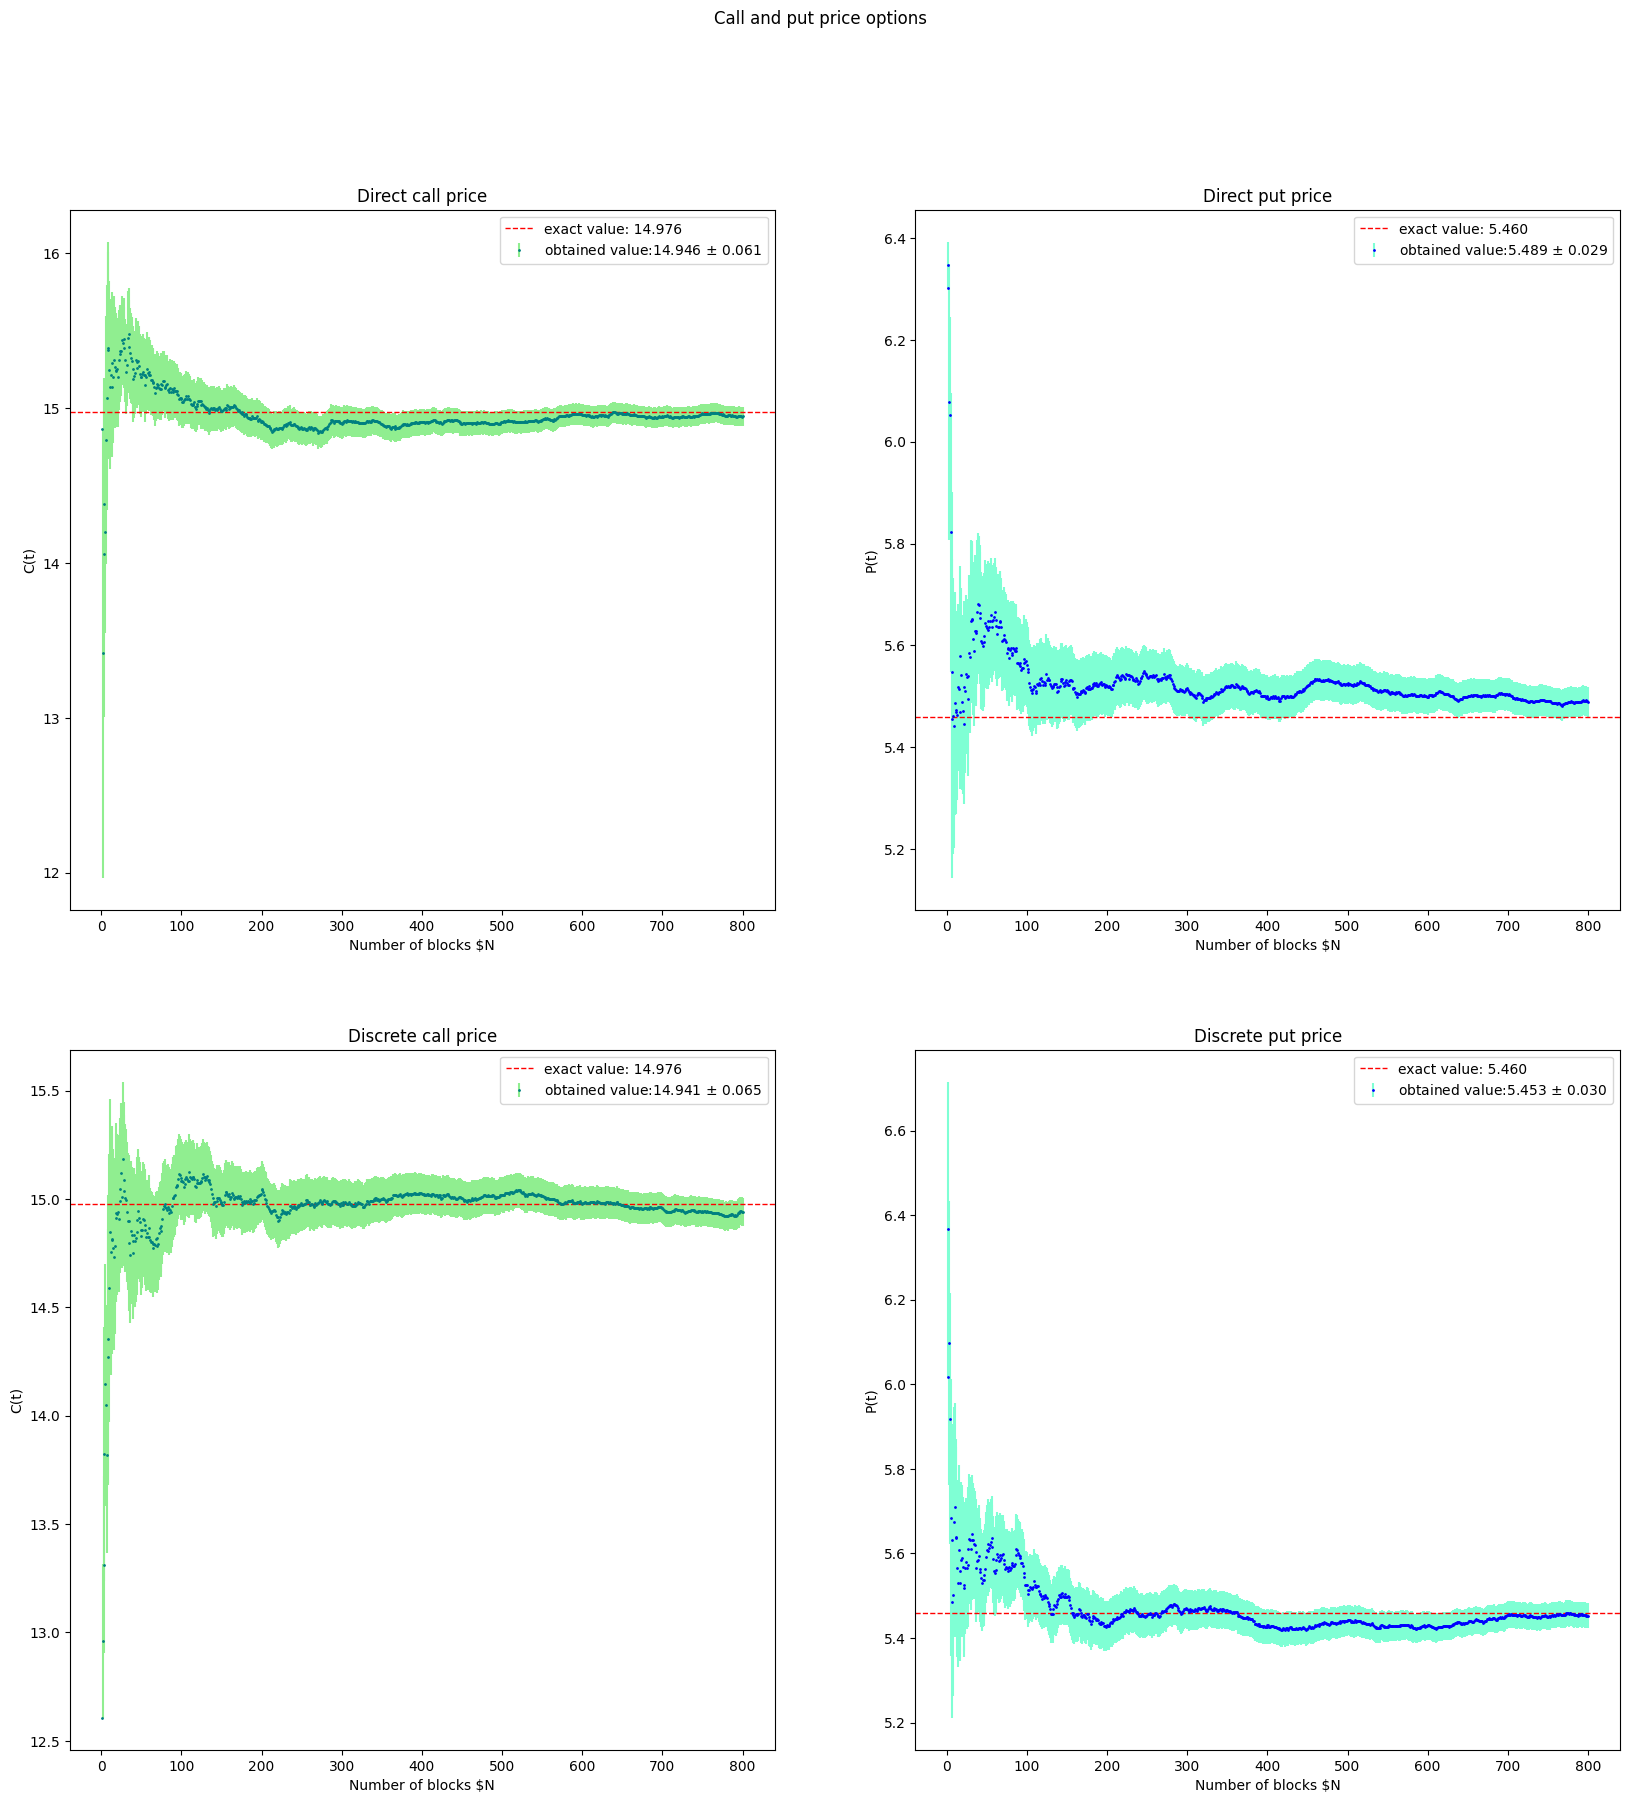

In [4]:
# Load data
data_files = ['../lecture_3/Results/ex_03.1_call_option_price_direct.dat', '../lecture_3/Results/ex_03.1_call_option_price_discrete.dat','../lecture_3/Results/ex_03.1_put_option_price_direct.dat','../lecture_3/Results/ex_03.1_put_option_price_discrete.dat']
data = [np.loadtxt(f, skiprows=1, unpack=True) for f in data_files]
# Create figure
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
plt.suptitle('Call and put price options')
# Labels and titles for both subplots
title = [['Direct call price', 'Direct put price'],['Discrete call price','Discrete put price']]
value = np.array([[14.975790778311286,5.4595325819072364],[14.975790778311286,5.4595325819072364]])
label=[['C(t)','P(t)'],['C(t)','P(t)']]
color=[['#008080','#90ee90'],['#008080','#90ee90'],['blue','#7fffd4'],['blue','#7fffd4']]
index=np.array([[0,0],[1,0],[0,1],[1,1]])
for j in range(4):
        i,k=index[j]
        ax[i,k].errorbar(data[j][0],data[j][1], color=color[j][0], yerr=data[j][2], label='obtained value:' + format(data[j][1][-1], '.3f')+ r' $\pm$ ' + format(data[j][2][-1], '.3f'), ecolor=color[j][1], alpha=1, fmt='.', markersize=2)
        ax[i,k].set_xlabel('Number of blocks $N')
        ax[i][k].set_ylabel(label[i][k])
        ax[i][k].set_title(title[i][k])
        ax[i][k].axhline(value[i][k], color='red', linestyle='--', linewidth=1,label='exact value: '+format(value[i][k],'.3f'))
        ax[i][k].legend()
# Show the plot
plt.show()